# Plot Fermi orbit ephemeris in timespan on a map

### Robert Cameron, May 2017

In [1]:
from ipywidgets import *
from IPython.display import *
%matplotlib notebook
from datetime import *
import re
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt, mpld3
from astropy.table import Table, Column

In [2]:
# data file directory: 
path = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/ephem/"

In [3]:
# read ASCII file of Fermi predicted ephemeris
file = "mGLAST_EPH_2017128_2017170_00.txt"
# example line:
#138 2017 10 00 00.000 -6779.647697 -408.287652 -1239.891845 -10.504 157.386 -91.037 23.082
t = Table.read(path+file, format='ascii')
tt = t[8:]
lat128 = tt['col9']
lon128 = tt['col10']

In [4]:
# read ASCII file of Fermi predicted ephemeris
file = "mGLAST_EPH_2017135_2017177_00.txt"
# example line:
#138 2017 10 00 00.000 -6779.578119 -404.541865 -1241.467090 -10.518 157.355 -91.073 23.075
t = Table.read(path+file, format='ascii')
tt = t[8:]
lat135 = tt['col9']
lon135 = tt['col10']

In [5]:
# read ASCII file of Fermi latitude, longitude telemetry
file = "latlon.20170518"
# example line:
#2017 05 18 138 10 00 00.940077 1495101600.940077 516794400.940077 -10.542646 157.301150
t = Table.read(path+file, format='ascii')
tt = t[1000:]
latTLM = tt['col10']
lonTLM = tt['col11']

In [6]:
# define the SAA region cases, and the offset from the actual orbit longitude values to give useful plots
saalon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saalat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]
lonchange = 0.0
# delete north-eastern slight vertex from SAA polygon, and plot lonTLM-1.7
#saalon = [ 33.9,  24.5,        -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
#saalat = [-30.0, -22.6,          5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]
#lonchange = -1.7
# delete north-eastern slight vertex from SAA polygon, and modify for "grazing incidence" on north-eastern facet
#saalon = [ 33.9,  24.5,        -29.5, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
#saalat = [-30.0, -22.6,          5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]
#lonchange = -5.6
# delete two north-eastern vertices from SAA polygon, and plot lonTLM-9.0
#saalon = [ 33.9,  24.5,               -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
#saalat = [-30.0, -22.6,                 5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]
#lonchange = -9.0

<IPython.core.display.Javascript object>


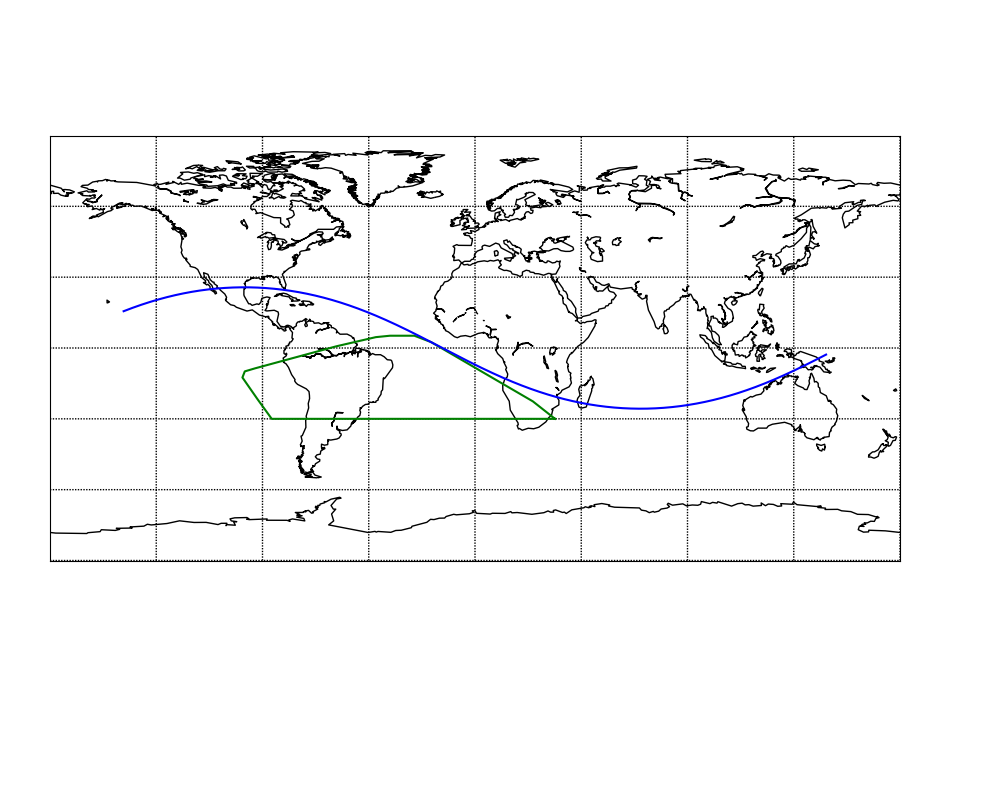

/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [7]:
plt.rc('figure', figsize = [10, 8])
plt.rc('font', size = 12)
plt.subplots_adjust(left=0.05, bottom=0.25)
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,45.))
m.plot(saalon,saalat, 'g-')
#m.plot(lon128,lat128, 'r')
#m.plot(lon135,lat135, 'b')
m.plot(lonTLM+lonchange,latTLM, 'b', markersize='12')
#m.plot(lonTLM,latTLM, 'r+', markersize='12')
plt.show()
mpld3.enable_notebook()